   # FASHION E-COMMERCE COMPANY PROJECT

An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

### Problem Statement
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import the dataset
ecom = pd.read_csv('Ecommerce Customers')

In [3]:
#Explore the dataset
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
#check more information on the dataset
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
#check numerical description of the dataset
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


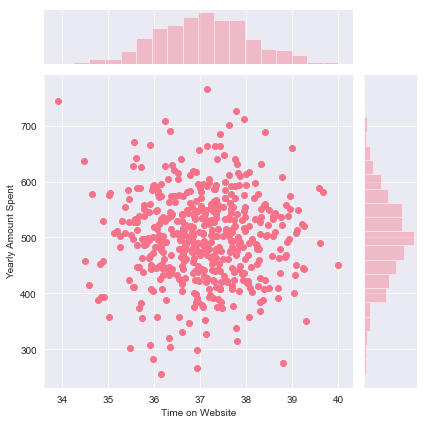

In [6]:
# Exploratory analysis using seaborn
sns.set_palette('husl')
sns.set_style('darkgrid')
sns.jointplot(data = ecom, x = 'Time on Website', y = 'Yearly Amount Spent')

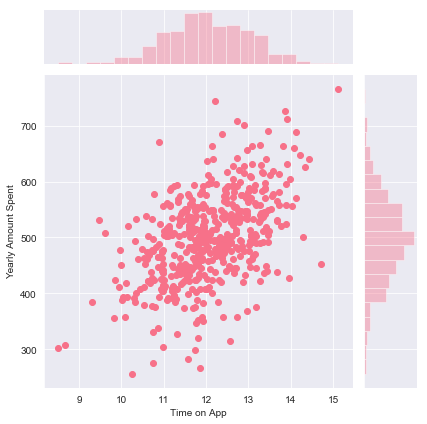

In [7]:
# Exploratory analysis cont'd
sns.jointplot(data = ecom, x = 'Time on App', y = 'Yearly Amount Spent')

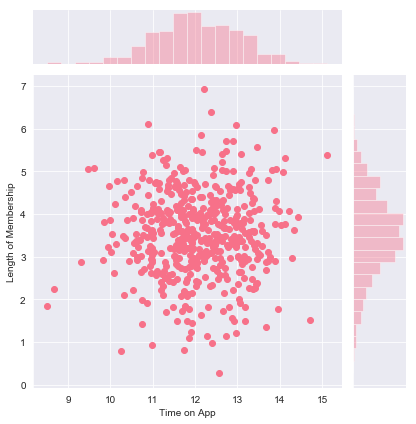

In [8]:
sns.jointplot(data = ecom, x = 'Time on App', y = 'Length of Membership')

**You will observe the the closest feature that affects how much a customer averagely spends is the Time on the app. Preliminary exploration shows that people who spend more time on the App are likely to spend more money buy clothes while more time on the website does not necessarily translate to purchase**

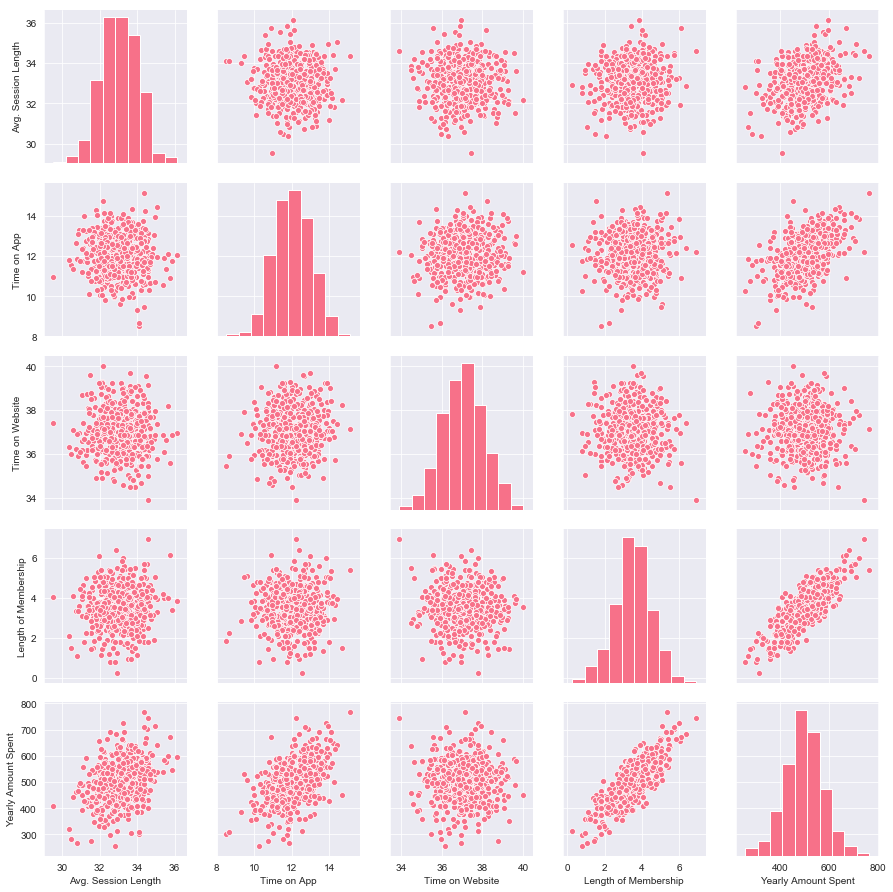

In [9]:
#Exploratory analysis cont'd
sns.pairplot(ecom)

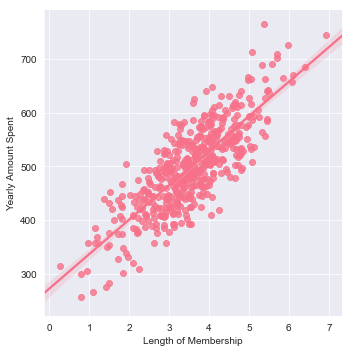

In [10]:
#From below, Length of Membership is likely going to translate to spending more money on the company. Customers with longer membership tend to spend more money. This could also mean that the company has excellent customer retention strategies
#Create a linear model plot of yearly spent vs Length of Membership
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = ecom)

In [11]:
#target feature
y = ecom['Yearly Amount Spent']

In [12]:
#independent variables (numerical features of customer)
x = ecom[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [13]:
#import modules from scikit-learn and split the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [14]:
#import linear Regression model
from sklearn.linear_model import LinearRegression

In [15]:
#create an instance of the model
lm = LinearRegression()

In [16]:
#train the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
#Evaluate the coefficients
lm.coef_

array([25.66678069, 38.42424328,  0.24012229, 61.98542444])

In [18]:
#Use the trained model to predict on the test data
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

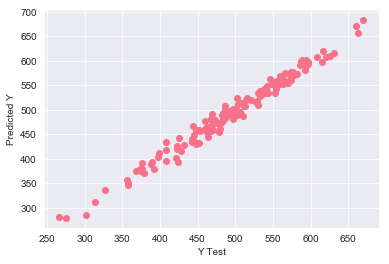

In [19]:
#Create a scatter plot of real values vs predicted values
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [20]:
# Evaluate metrics import metrics module
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [21]:
print(mae)
print(mse)
print(rmse)

8.254815085699839
111.23990592145952
10.547033038796243


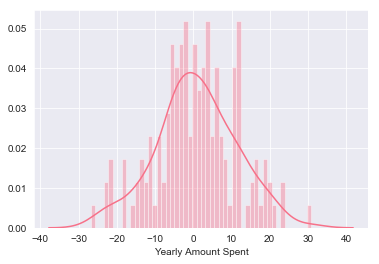

In [22]:
#use histogram to view distribution of data
sns.distplot((y_test-predictions),bins=50);

In [23]:
#Check residuals
coefficients = pd.DataFrame(lm.coef_,x.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
Avg. Session Length,25.666781
Time on App,38.424243
Time on Website,0.240122
Length of Membership,61.985424


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.58 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.97 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.67 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.77 total dollars spent**.

**For the short term, the company should focus on the mobile app, however, in the long term, an online presence is not optional. People want to search for your producst online and see it come up. There are still customers who prefer to shop on their computers. The website should be developed to the feel of the mobile app. However, company should look more into retaining it's customers because that is one factor that has definitly translated to profit. The longer the membership, the more money spent yearly**